In [1]:
import pandas as pd

In [9]:
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [10]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [11]:
a_renomear ={'unfinished' : 'nao_finalizado','expected_hours' : 'horas_esperadas','price' : 'preco'}

In [12]:
dados.rename(columns=a_renomear, inplace=True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [14]:
troca = {
    0:1,
    1:0
}

dados['finalizados']= dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [15]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [16]:
import seaborn as sns

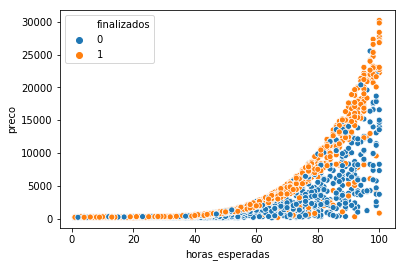

In [18]:
sns.scatterplot(x='horas_esperadas',y='preco', data=dados, hue='finalizados')

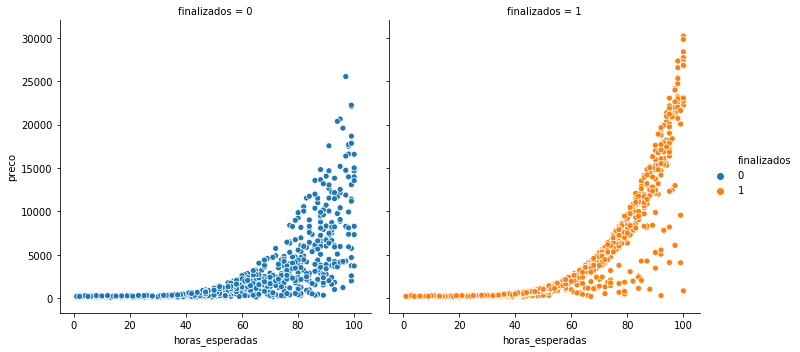

In [23]:
sns.relplot(x='horas_esperadas',y='preco', data=dados, col='finalizados', hue='finalizados')

In [25]:
x=dados[['horas_esperadas','preco']]
y=dados['finalizados']

In [132]:
from sklearn.svm import LinearSVC # Modelo de previsão
from sklearn.metrics import accuracy_score # calcula a acurácia
from sklearn.model_selection import train_test_split  # ja devolve os valores segmentados

SEED = 20 # defini a ordem dos números aleátorio.. garantindo o mesmo resultado
np.random.seed(SEED)

treino_x, teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )


modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 47.96%


C:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [133]:
import numpy as np
previsoes_de_base =  np.ones(540)

In [134]:
acuracia = accuracy_score(teste_y,previsoes_de_base)
print('A acurácia foi de %.2f%%' %(acuracia*100))

A acurácia foi de 52.04%


# Análisando os erros_

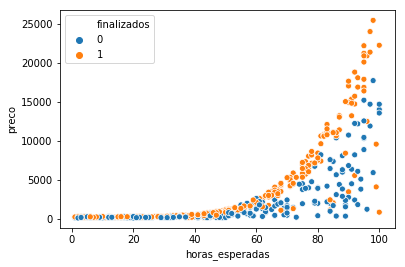

In [135]:
sns.scatterplot(x='horas_esperadas',y='preco', data=teste_x, hue=teste_y) # entendendo a base de teste

In [136]:
# pegar valores aleatórios dentro do x e y e verificar como o nosso programa vai interpretar esses dados.
# isso só funciona em previsoes com 2 dimenções

In [137]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(f'''
x_min = {x_min}
x_max = {x_max}

y_min = {y_min}
y_max = {y_max}
''')


x_min = 1
x_max = 100

y_min = 100
y_max = 25427



In [138]:
pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min) / pixels)

In [139]:
xx,yy = np.meshgrid(eixo_x,eixo_y)

In [140]:
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [141]:
pontos = np.c_[xx.ravel(), yy.ravel()]

In [142]:
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.517373e+04],
       [9.802000e+01, 2.517373e+04],
       [9.901000e+01, 2.517373e+04]])

In [143]:
Z = modelo.predict(pontos)

In [144]:
Z = Z.reshape(xx.shape)

In [145]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [146]:
import matplotlib.pyplot as plt

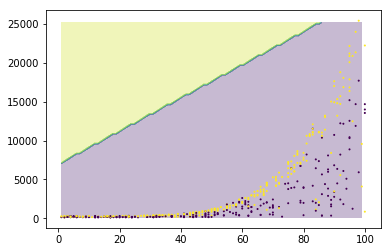

In [147]:
plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y, s=1)

### Obs.. o nosso modelo só consegue prever retas, por esse motivo não estamos conseguindo prever a curva com um indice adequado de precisão

In [152]:
from sklearn.svm import SVC # Modelo de previsão
from sklearn.metrics import accuracy_score # calcula a acurácia
from sklearn.model_selection import train_test_split  # ja devolve os valores segmentados

SEED = 20 # defini a ordem dos números aleátorio.. garantindo o mesmo resultado
np.random.seed(SEED)

treino_x, teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )


modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 56.30%



x_min = 1
x_max = 100

y_min = 100
y_max = 25427



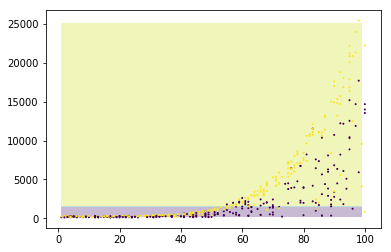

In [153]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

print(f'''
x_min = {x_min}
x_max = {x_max}

y_min = {y_min}
y_max = {y_max}
''')


pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min) / pixels)
xx,yy = np.meshgrid(eixo_x,eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)


plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c= teste_y, s=1)

### Obs: Escalas diferentes causam problema na previsão, temos de reescalar tudo para uma faixa similar

# Fazendo um tipo de préprocessamento de dados - Ajustando as escalas

In [161]:
from sklearn.preprocessing import StandardScaler # préprocessamento dos dados, ajustando as escalas


from sklearn.svm import SVC # Modelo de previsão
from sklearn.metrics import accuracy_score # calcula a acurácia
from sklearn.model_selection import train_test_split  # ja devolve os valores segmentados

SEED = 20 # defini a ordem dos números aleátorio.. garantindo o mesmo resultado
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y,teste_y = train_test_split(x,y,test_size=0.25)
print('Treinamos com %d elementos e testaremos com %d elementos' %(len(treino_x), len(teste_x)) )

#Vamos reescalar os conjunto
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print('A acurácia foi de %.2f%%' %(acuracia*100))

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 68.70%



x_min = -1.736163999152533
x_max = 1.727358232467318

y_min = -0.5961189783214131
y_max = 4.278051835986176



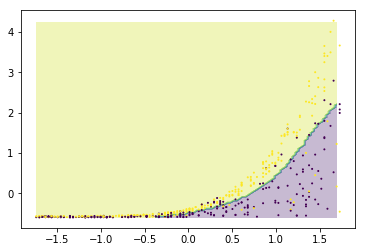

In [162]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

print(f'''
x_min = {x_min}
x_max = {x_max}

y_min = {y_min}
y_max = {y_max}
''')


pixels = 100
eixo_x = np.arange(x_min, x_max,(x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max,(y_max - y_min) / pixels)
xx,yy = np.meshgrid(eixo_x,eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(data_x, data_y, c= teste_y, s=1)